In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train_v2_drcat_02.csv')

In [3]:
df

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


The dataset has 44868 rows and 5 columns.
* text: essay by student or machine
* label: 0 for humans, 1 for machine
* prompt_name: original persuade prompta
* source: source dataset
* RDizzl3_seven: Is from "7 Prompts training dataset" or not? refer to:https://www.kaggle.com/competitions/llm-detect-ai-generated-text/discussion/453410

## EDA

#### missing data

In [5]:
df.isna().any()

text             False
label            False
prompt_name      False
source           False
RDizzl3_seven    False
dtype: bool

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


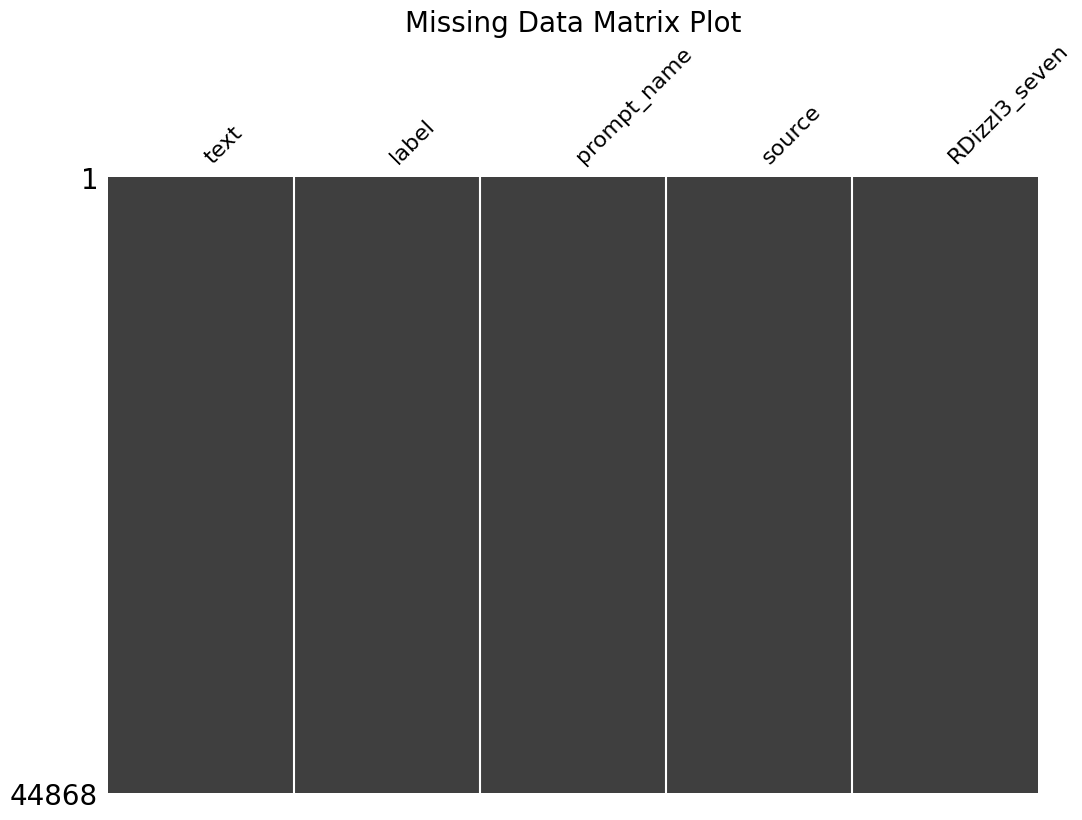

In [6]:
import missingno as msno

# Matrix plot -- missing data visualization
fig, ax = plt.subplots(figsize=(12, 8))

msno.matrix(df, ax=ax)
plt.title('Missing Data Matrix Plot', size=20)
plt.show()

There is no missing data in the dataset.

#### Duplicate data

In [7]:
df.duplicated().any()

False

No duplicate rows.

#### Data balance

In [8]:
labels_count = df['label'].value_counts()
labels_count.index = ['0: human','1: machine']

In [9]:
labels_count

0: human      27371
1: machine    17497
Name: label, dtype: int64

In [ ]:
sns.barh()

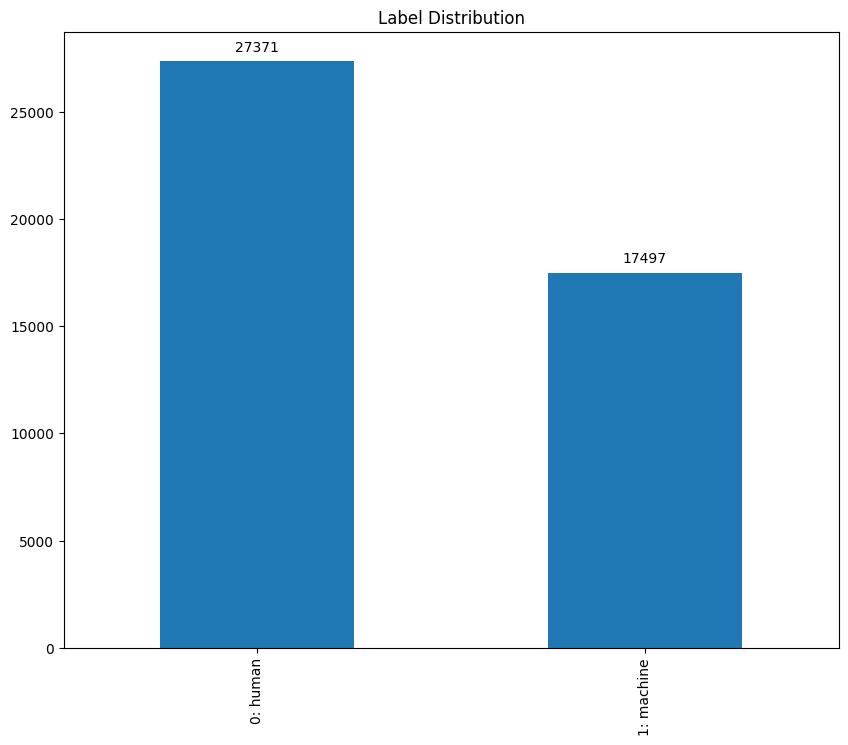

In [10]:
# fig, ax = plt.subplots(figsize=(10, 8))
# labels_count.plot(kind='bar',ax=ax)
# for bar in ax.patches:
#     # The text annotation for each bar should be its height (count)
#     ax.annotate(f'{bar.get_height()}',  # Text to display (count of the bar)
#                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position (center of the bar, top of the bar)
#                 ha='center',  # Center the text horizontally
#                 va='bottom',  # Vertically align the text to the bottom (to appear above the bar)
#                 xytext=(0, 5),  # 5 points vertical offset
#                 textcoords='offset points')
# plt.title('Label Distribution')
# plt.show()

Human written essays are 10000 more than machine generated. We will consider oversampling or undersampling.

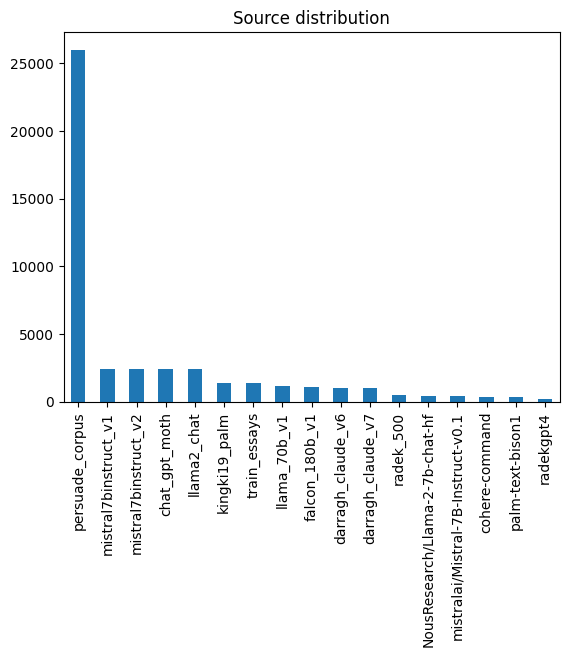

In [11]:
df['source'].value_counts().plot(kind='bar')
plt.title("Source distribution")
plt.show()

data are mainly from persuade_corpus

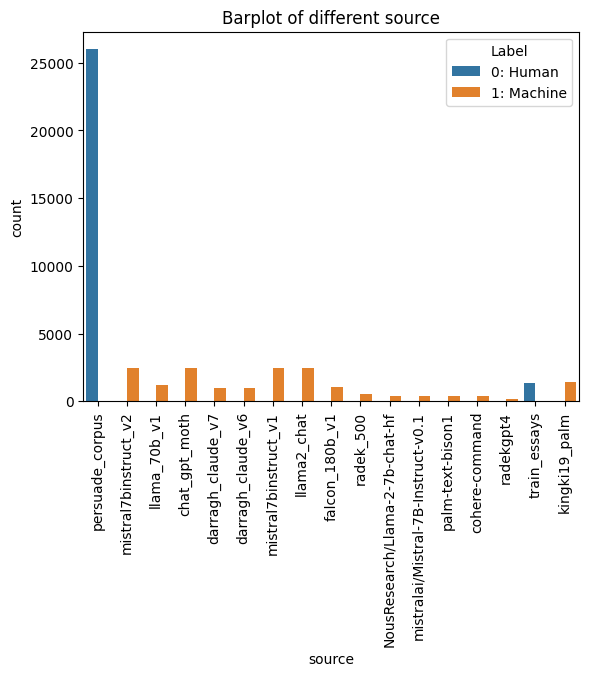

In [43]:
p = sns.countplot(df, x="source", hue="label")
plt.xticks(rotation=90)
plt.title("Barplot of different source")
plt.legend(title='Label', loc='upper right', labels=['0: Human', '1: Machine'])
plt.show()

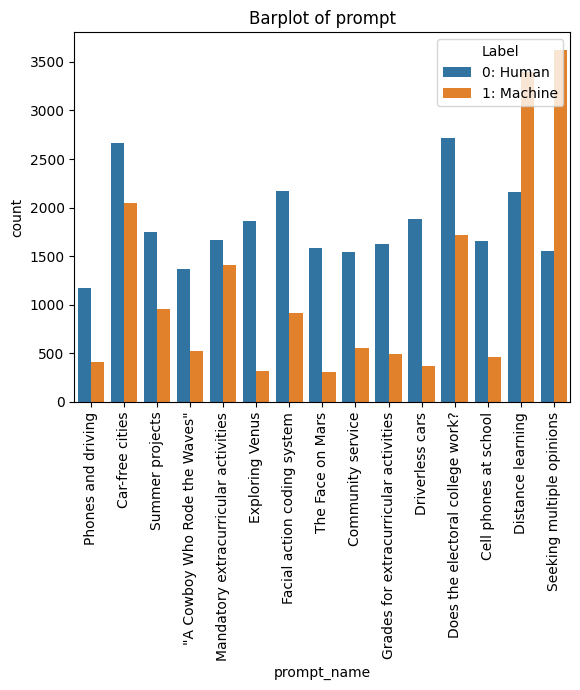

In [45]:
p = sns.countplot(df, x="prompt_name", hue="label")
plt.xticks(rotation=90)
plt.title("Barplot of prompt")
plt.legend(title='Label', loc='upper right', labels=['0: Human', '1: Machine'])
plt.show()

human written essays are mainly from persuade_corpus and train_essays. And the machine generated essays are from different LLMs.

#### human essays

In [15]:
human_df = df[df['label'] == 0]

In [16]:
human_essays = human_df['text'].str.lower().tolist()

In [17]:
import random
random.seed(42)

In [18]:
random_human_essays = random.choices(human_essays,k=3)

In [19]:
random_human_essays[0]

'i think that driverless cars are great. you dont have to drive when you are trying to put on makeup or do other things that u dont have time to do when you are in the house. it would make it easier when you have to go somewhere and you do it feel lke driving. there will be self driven cars in the future. it is a big negative on having self driven cars to one messup in the cars system and it can take away lifes. it could be a tragic accident from jus one messup. there is many things that can go wrong but not alot of things that can go right.\n\nhaving driverless cars have its pros and its cons in all i think it would be a good thing. if something goes wrong thought the dealership could have alot of legal problems. then te us will have to change some of the laws if they make driverless cars. i think that druverless cars could be the next big thing if it becomes a sucess. there become a great what if factor if they go through with the driverless cars. what would be the point if you still

need to replace \n by a space

In [20]:
random_human_essays[1]

'title\n\ndrivers should not be allowed to use cell phones while driving. drivers should not be able to use their cellphones while driving, for the reason that the use of a cell phone while operating a motor vehicle is exceedingly hazardous for the driver, as well as others who are traveling along the same road. the use of mobile devices while on the road leads to distracted driving which means that the driver is less likely to notice road and safety signals, pedestrians and the signals coming from other vehicles. failure to heed these signals has led to injuries and death that could have been prevented had the driver not been using a mobile device while on the wheel. in the u.s., there are laws banning the use of mobile devices or the act of texting while someone is on the wheel.\n\nthe national safety council reports that cell phone use while driving leads to 1.6 million crashes each year. nearly 390,000 injuries occur each year from accidents caused by texting while driving. 1 out o

the website after Works Cited. consider to delete all work cited or

In [21]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Step 1: Remove HTML tags
def remove_html_tags(text):
    bsoup = BeautifulSoup(text, "html.parser")
    return bsoup.get_text()

# Step 2: Convert multiple whitespace characters to a single space
def remove_multiple_whitespace_chars(text):
    return re.sub(r'\s+', ' ', text)

# Step 3: Remove content between square brackets
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Step 4: Remove special characters
def remove_special_chars(text):
    return re.sub('[^a-zA-z0-9\s]', '', text)

# Step 5: Removing stop words
def remove_stop_words(text):
    text = text.strip().lower() #strip whitespaces and make all lowercase
    word_tokens = word_tokenize(text)
    tokens_wo_stopwords = [token for token in word_tokens if token not in stop_words]
    text_wo_stopwords = ' '.join(tokens_wo_stopwords)
    return text_wo_stopwords

# Combine all into one preprocessing function
def preprocess(text):
    text = remove_html_tags(text)
    text = remove_multiple_whitespace_chars(text) # Ensure this step is included
    text = remove_square_brackets(text)
    text = remove_special_chars(text)
    text = remove_stop_words(text)
    return text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
random_human_essays[2]

"i disagree about what the principal has decide because some student don't like sports or any other activities at school. they are probably don't do that activities because they don't know how to play or do those activities and some activities you have to buy all the things that you need for that activities but they don't have money to buy all the stuff.\n\nother people might fortgot to give the paper that they need for the sports or any kinda of activities and they cant go or play sports just because of that reason and some people dont do a sports because other student will judges them because they might be bad at playing that sports and they will judges them.\n\nother student played sports but scared to play now because she or he might got hurt when he played last time and she or he might got scared because of that reason and people will call him or her weak just because she or he fell or got hurt.\n\nnot everyone are good at playing sports and even though they probably know how to p

In [23]:
human_token = [nltk.word_tokenize(preprocess(essay)) for essay in human_essays]

In [24]:
human_token = [w for doc in human_token for w in doc]

In [25]:
len(human_token)

5715888

In [26]:
human_vocab = set(human_token)

In [27]:
len(human_vocab)

84092

In [28]:
llm_df = df[df['label'] == 1]
llm_essays = llm_df['text'].str.lower().tolist()
llm_token = [nltk.word_tokenize(preprocess(essay)) for essay in llm_essays]

llm_token = [w for doc in llm_token for w in doc]

In [29]:
len(llm_token)

3135806

In [30]:
llm_vocab = set(llm_token)
len(llm_vocab)

25338

In [31]:
from collections import Counter

top_10_human = Counter(human_token).most_common(10)
top_10_machine = Counter(llm_token).most_common(10)

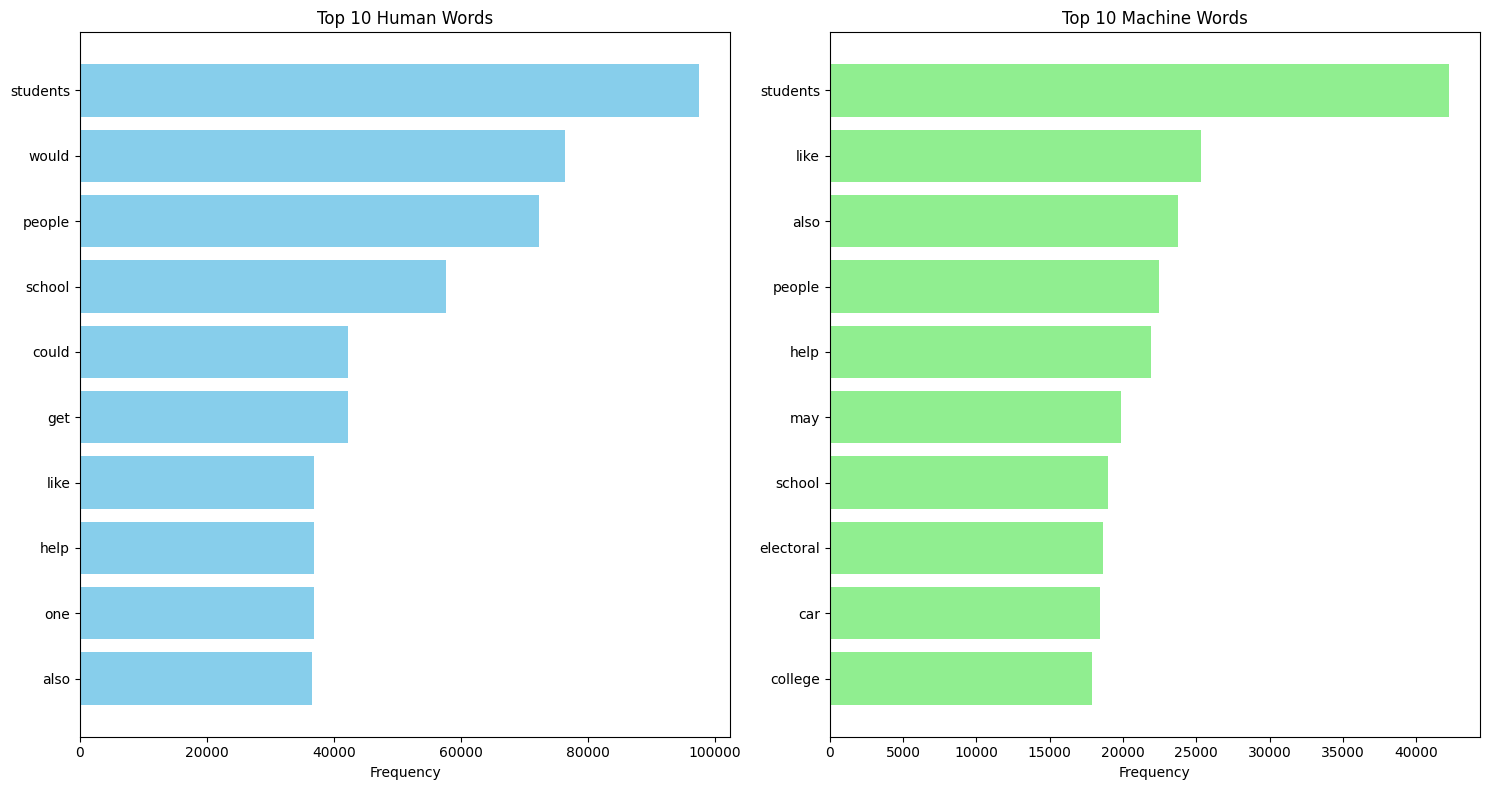

In [32]:
# Separate words and counts for human and machine
human_words, human_counts = zip(*top_10_human)
machine_words, machine_counts = zip(*top_10_machine)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Human bar chart
axs[0].barh(human_words, human_counts, color='skyblue')
axs[0].set_title('Top 10 Human Words')
axs[0].set_xlabel("Frequency")
axs[0].invert_yaxis()

# Machine bar chart
axs[1].barh(machine_words, machine_counts, color='lightgreen')
axs[1].set_title('Top 10 Machine Words')
axs[1].set_xlabel("Frequency")
axs[1].invert_yaxis()

# Layout adjustments
plt.tight_layout()
plt.savefig('top10.png')

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
vectorizer.get_stop_words()

In [49]:
print(X)

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


# Classify article by TF-IDF

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming `texts` is your list of articles and `labels` are the corresponding labels (0 for human, 1 for machine-generated)
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X = vectorizer.fit_transform(df['text'])
y = df['label'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [55]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5481
           1       0.96      0.89      0.93      3493

    accuracy                           0.94      8974
   macro avg       0.95      0.93      0.94      8974
weighted avg       0.95      0.94      0.94      8974

